In [92]:
#Libraries
import pandas as pd, numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns", 101)

## Data Wrangling & Visualization

In [93]:
# Dataset is already loaded below
tr_data = pd.read_csv("train.csv")
tr_data.head()

id            Timestamp  Daily Time Spent on Site  Age  Area Income  \
0  1200  2016-01-01 02:52:10                     80.67   34     58909.36   
1  1201  2016-01-01 03:35:35                     68.01   25     68357.96   
2  1202  2016-01-01 05:31:22                     80.94   36     60803.00   
3  1203  2016-01-01 08:27:06                     78.77   28     63497.62   
4  1204  2016-01-01 15:14:24                     36.56   29     42838.29   

   Daily Internet Usage                                   Ad Topic Line  \
0                239.76               Seamless impactful info-mediaries   
1                188.32                 Ameliorated actuating workforce   
2                239.94                    Self-enabling local strategy   
3                211.83  Public-key intangible Graphical User Interface   
4                195.89       Team-oriented bi-directional secured line   

   gender      Country  Clicked  
0       0     Portugal        0  
1       1  Afghanistan        0  
2       0      Bermuda        0  
3       0         Guam        0  
4       0       Uganda        1

In [94]:
tr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1000 non-null   int64  
 1   Timestamp                 1000 non-null   object 
 2   Daily Time Spent on Site  1000 non-null   float64
 3   Age                       1000 non-null   int64  
 4   Area Income               775 non-null    float64
 5   Daily Internet Usage      1000 non-null   float64
 6   Ad Topic Line             1000 non-null   object 
 7   gender                    1000 non-null   int64  
 8   Country                   1000 non-null   object 
 9   Clicked                   1000 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 78.2+ KB


In [95]:
tr_data.duplicated().sum()

0

In [96]:
tr_data.describe(include=object)

Timestamp                         Ad Topic Line  Country
count                  1000                                  1000     1000
unique                  775                                   825      233
top     2016-03-21 18:46:41  Fully-configurable eco-centric frame  Bahamas
freq                      2                                     2       12

In [97]:
tr_data.isnull().sum()

id                            0
Timestamp                     0
Daily Time Spent on Site      0
Age                           0
Area Income                 225
Daily Internet Usage          0
Ad Topic Line                 0
gender                        0
Country                       0
Clicked                       0
dtype: int64

In [98]:
tr_data['Area Income'].value_counts()

70377.23    1
48679.54    1
67575.12    1
50333.72    1
60805.93    1
           ..
59419.78    1
50711.68    1
26130.93    1
61383.79    1
42162.90    1
Name: Area Income, Length: 775, dtype: int64

In [99]:
tr_data.Clicked.value_counts()

1    503
0    497
Name: Clicked, dtype: int64

In [100]:
tr_data['Area Income'] = tr_data['Area Income'].fillna((tr_data['Area Income'].mean()))

In [101]:
tr_data.isnull().sum()

id                          0
Timestamp                   0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
gender                      0
Country                     0
Clicked                     0
dtype: int64

In [102]:
tr_data.shape

(1000, 10)

In [103]:
tr_data.describe()

id  Daily Time Spent on Site          Age   Area Income  \
count  1000.000000               1000.000000  1000.000000   1000.000000   
mean   1699.500000                 65.120650    35.816000  55343.014555   
std     288.819436                 15.781456     8.782669  11603.475988   
min    1200.000000                 32.600000    19.000000  14548.060000   
25%    1449.750000                 51.450000    29.000000  51316.842500   
50%    1699.500000                 68.390000    35.000000  55343.014555   
75%    1949.250000                 78.572500    41.250000  63100.645000   
max    2199.000000                 91.370000    61.000000  79484.800000   

       Daily Internet Usage       gender      Clicked  
count           1000.000000  1000.000000  1000.000000  
mean             179.592310     0.474000     0.503000  
std               43.735785     0.499573     0.500241  
min              105.000000     0.000000     0.000000  
25%              137.885000     0.000000     0.000000  
50%              182.425000     0.000000     1.000000  
75%              217.707500     1.000000     1.000000  
max              269.960000     1.000000     1.000000

In [104]:
tr_data.columns

Index(['id', 'Timestamp', 'Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'gender', 'Country',
       'Clicked'],
      dtype='object')

In [105]:
tr_data['Country Codes']= tr_data['Country'].astype('category').cat.codes
tr_data[['Country Codes']].head(5)

Country Codes
0            166
1              0
2             23
3             82
4            216

In [106]:
tr_data['year'] = pd.to_datetime(tr_data.Timestamp).dt.year
tr_data['month'] = pd.to_datetime(tr_data.Timestamp).dt.month
tr_data['day'] = pd.to_datetime(tr_data.Timestamp).dt.day
tr_data['hour'] = pd.to_datetime(tr_data.Timestamp).dt.hour
tr_data['min'] = pd.to_datetime(tr_data.Timestamp).dt.minute
tr_data['sec'] = pd.to_datetime(tr_data.Timestamp).dt.second
tr_data = tr_data.drop('Timestamp', axis = 1)
tr_data.head()

id  Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0  1200                     80.67   34     58909.36                239.76   
1  1201                     68.01   25     68357.96                188.32   
2  1202                     80.94   36     60803.00                239.94   
3  1203                     78.77   28     63497.62                211.83   
4  1204                     36.56   29     42838.29                195.89   

                                    Ad Topic Line  gender      Country  \
0               Seamless impactful info-mediaries       0     Portugal   
1                 Ameliorated actuating workforce       1  Afghanistan   
2                    Self-enabling local strategy       0      Bermuda   
3  Public-key intangible Graphical User Interface       0         Guam   
4       Team-oriented bi-directional secured line       0       Uganda   

   Clicked  Country Codes  year  month  day  hour  min  sec  
0        0            166  2016      1    1     2   52   10  
1        0              0  2016      1    1     3   35   35  
2        0             23  2016      1    1     5   31   22  
3        0             82  2016      1    1     8   27    6  
4        1            216  2016      1    1    15   14   24

In [107]:
tr_data['Country'].value_counts()

Bahamas         12
Venezuela       10
Cyprus          10
Luxembourg       9
Moldova          9
                ..
Swaziland        1
Aruba            1
Sierra Leone     1
Germany          1
Slovenia         1
Name: Country, Length: 233, dtype: int64

In [108]:
tr_data['Ad Topic Line'].value_counts()

Fully-configurable eco-centric frame     2
Networked regional Local Area Network    2
Face-to-face methodical intranet         2
Robust dedicated system engine           2
Face-to-face analyzing encryption        2
                                        ..
Public-key zero-defect analyzer          1
Synergized uniform hierarchy             1
Operative stable moderator               1
Phased fault-tolerant definition         1
Synchronized multi-tasking ability       1
Name: Ad Topic Line, Length: 825, dtype: int64

In [112]:
tr_data.corr()

id  Daily Time Spent on Site       Age  \
id                        1.000000                 -0.002061  0.001163   
Daily Time Spent on Site -0.002061                  1.000000 -0.247097   
Age                       0.001163                 -0.247097  1.000000   
Area Income              -0.026853                  0.287336 -0.167001   
Daily Internet Usage      0.019656                  0.374857 -0.310589   
gender                    0.019717                  0.003397 -0.036910   
Clicked                   0.032303                 -0.581175  0.370820   
Country Codes             0.010618                 -0.000026 -0.006021   
year                           NaN                       NaN       NaN   
month                     0.980064                 -0.002999  0.007648   
day                       0.206890                  0.007457 -0.035174   
hour                     -0.012051                 -0.000697 -0.025217   
min                      -0.075524                 -0.006930 -0.020935   
sec                       0.059763                  0.021292 -0.013544   

                          Area Income  Daily Internet Usage    gender  \
id                          -0.026853              0.019656  0.019717   
Daily Time Spent on Site     0.287336              0.374857  0.003397   
Age                         -0.167001             -0.310589 -0.036910   
Area Income                  1.000000              0.303404  0.026695   
Daily Internet Usage         0.303404              1.000000  0.014950   
gender                       0.026695              0.014950  1.000000   
Clicked                     -0.421993             -0.589340 -0.029729   
Country Codes                0.036683              0.021349 -0.022890   
year                              NaN                   NaN       NaN   
month                       -0.022480              0.016066  0.019279   
day                         -0.020808              0.019010  0.004071   
hour                         0.022469              0.092216  0.027379   
min                         -0.000326              0.012292  0.038219   
sec                          0.003311              0.019703  0.028404   

                           Clicked  Country Codes  year     month       day  \
id                        0.032303       0.010618   NaN  0.980064  0.206890   
Daily Time Spent on Site -0.581175      -0.000026   NaN -0.002999  0.007457   
Age                       0.370820      -0.006021   NaN  0.007648 -0.035174   
Area Income              -0.421993       0.036683   NaN -0.022480 -0.020808   
Daily Internet Usage     -0.589340       0.021349   NaN  0.016066  0.019010   
gender                   -0.029729      -0.022890   NaN  0.019279  0.004071   
Clicked                   1.000000       0.011980   NaN  0.041119 -0.037775   
Country Codes             0.011980       1.000000   NaN  0.006513  0.029087   
year                           NaN            NaN   NaN       NaN       NaN   
month                     0.041119       0.006513   NaN  1.000000  0.010462   
day                      -0.037775       0.029087   NaN  0.010462  1.000000   
hour                     -0.051893      -0.005117   NaN -0.029555  0.049486   
min                       0.007160      -0.023096   NaN -0.089101  0.058621   
sec                      -0.037082       0.009816   NaN  0.054280  0.034037   

                              hour       min       sec  
id                       -0.012051 -0.075524  0.059763  
Daily Time Spent on Site -0.000697 -0.006930  0.021292  
Age                      -0.025217 -0.020935 -0.013544  
Area Income               0.022469 -0.000326  0.003311  
Daily Internet Usage      0.092216  0.012292  0.019703  
gender                    0.027379  0.038219  0.028404  
Clicked                  -0.051893  0.007160 -0.037082  
Country Codes            -0.005117 -0.023096  0.009816  
year                           NaN       NaN       NaN  
month                    -0.029555 -0.089101  0.054280  
day         

In [113]:
tr_data.groupby('Clicked')['Clicked', 'Daily Time Spent on Site', 'Age', 'Area Income', 
                            'Daily Internet Usage'].mean()

<ipython-input-113-ae692fcb94ac>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tr_data.groupby('Clicked')['Clicked', 'Daily Time Spent on Site', 'Age', 'Area Income',


Clicked  Daily Time Spent on Site        Age   Area Income  \
Clicked                                                               
0            0.0                 74.343018  32.541247  60266.599056   
1            1.0                 56.008290  39.051690  50478.160684   

         Daily Internet Usage  
Clicked                        
0                  205.509718  
1                  153.984056

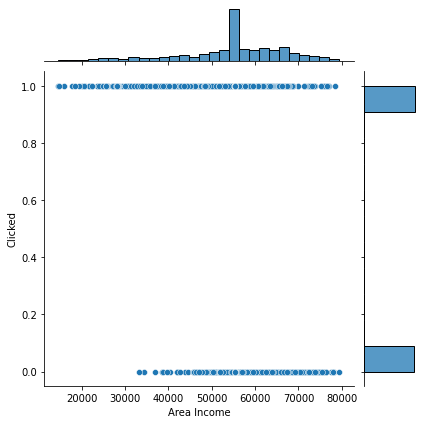

In [114]:
sns.jointplot(x='Area Income', y='Clicked',data=tr_data)

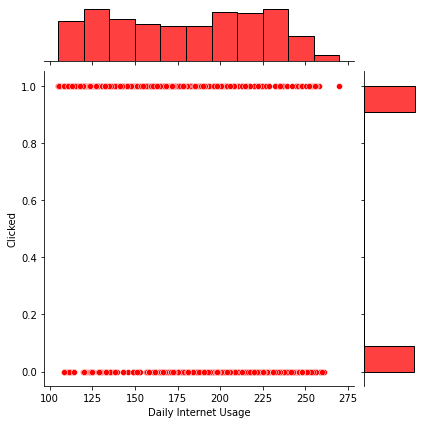

In [115]:
sns.jointplot(x='Daily Internet Usage', y='Clicked',data=tr_data,color='red')

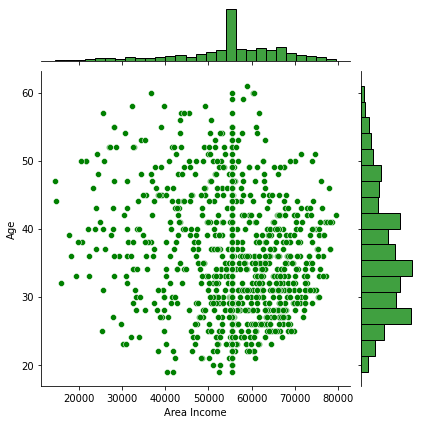

In [116]:
sns.jointplot(x='Area Income',y='Age',data=tr_data,color='green')

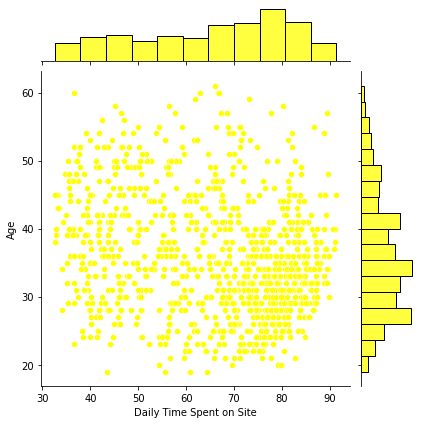

In [117]:
#jointplot showing Daliy time spent on site vs Age
sns.jointplot(x='Daily Time Spent on Site',y='Age',data=tr_data,color='Yellow')

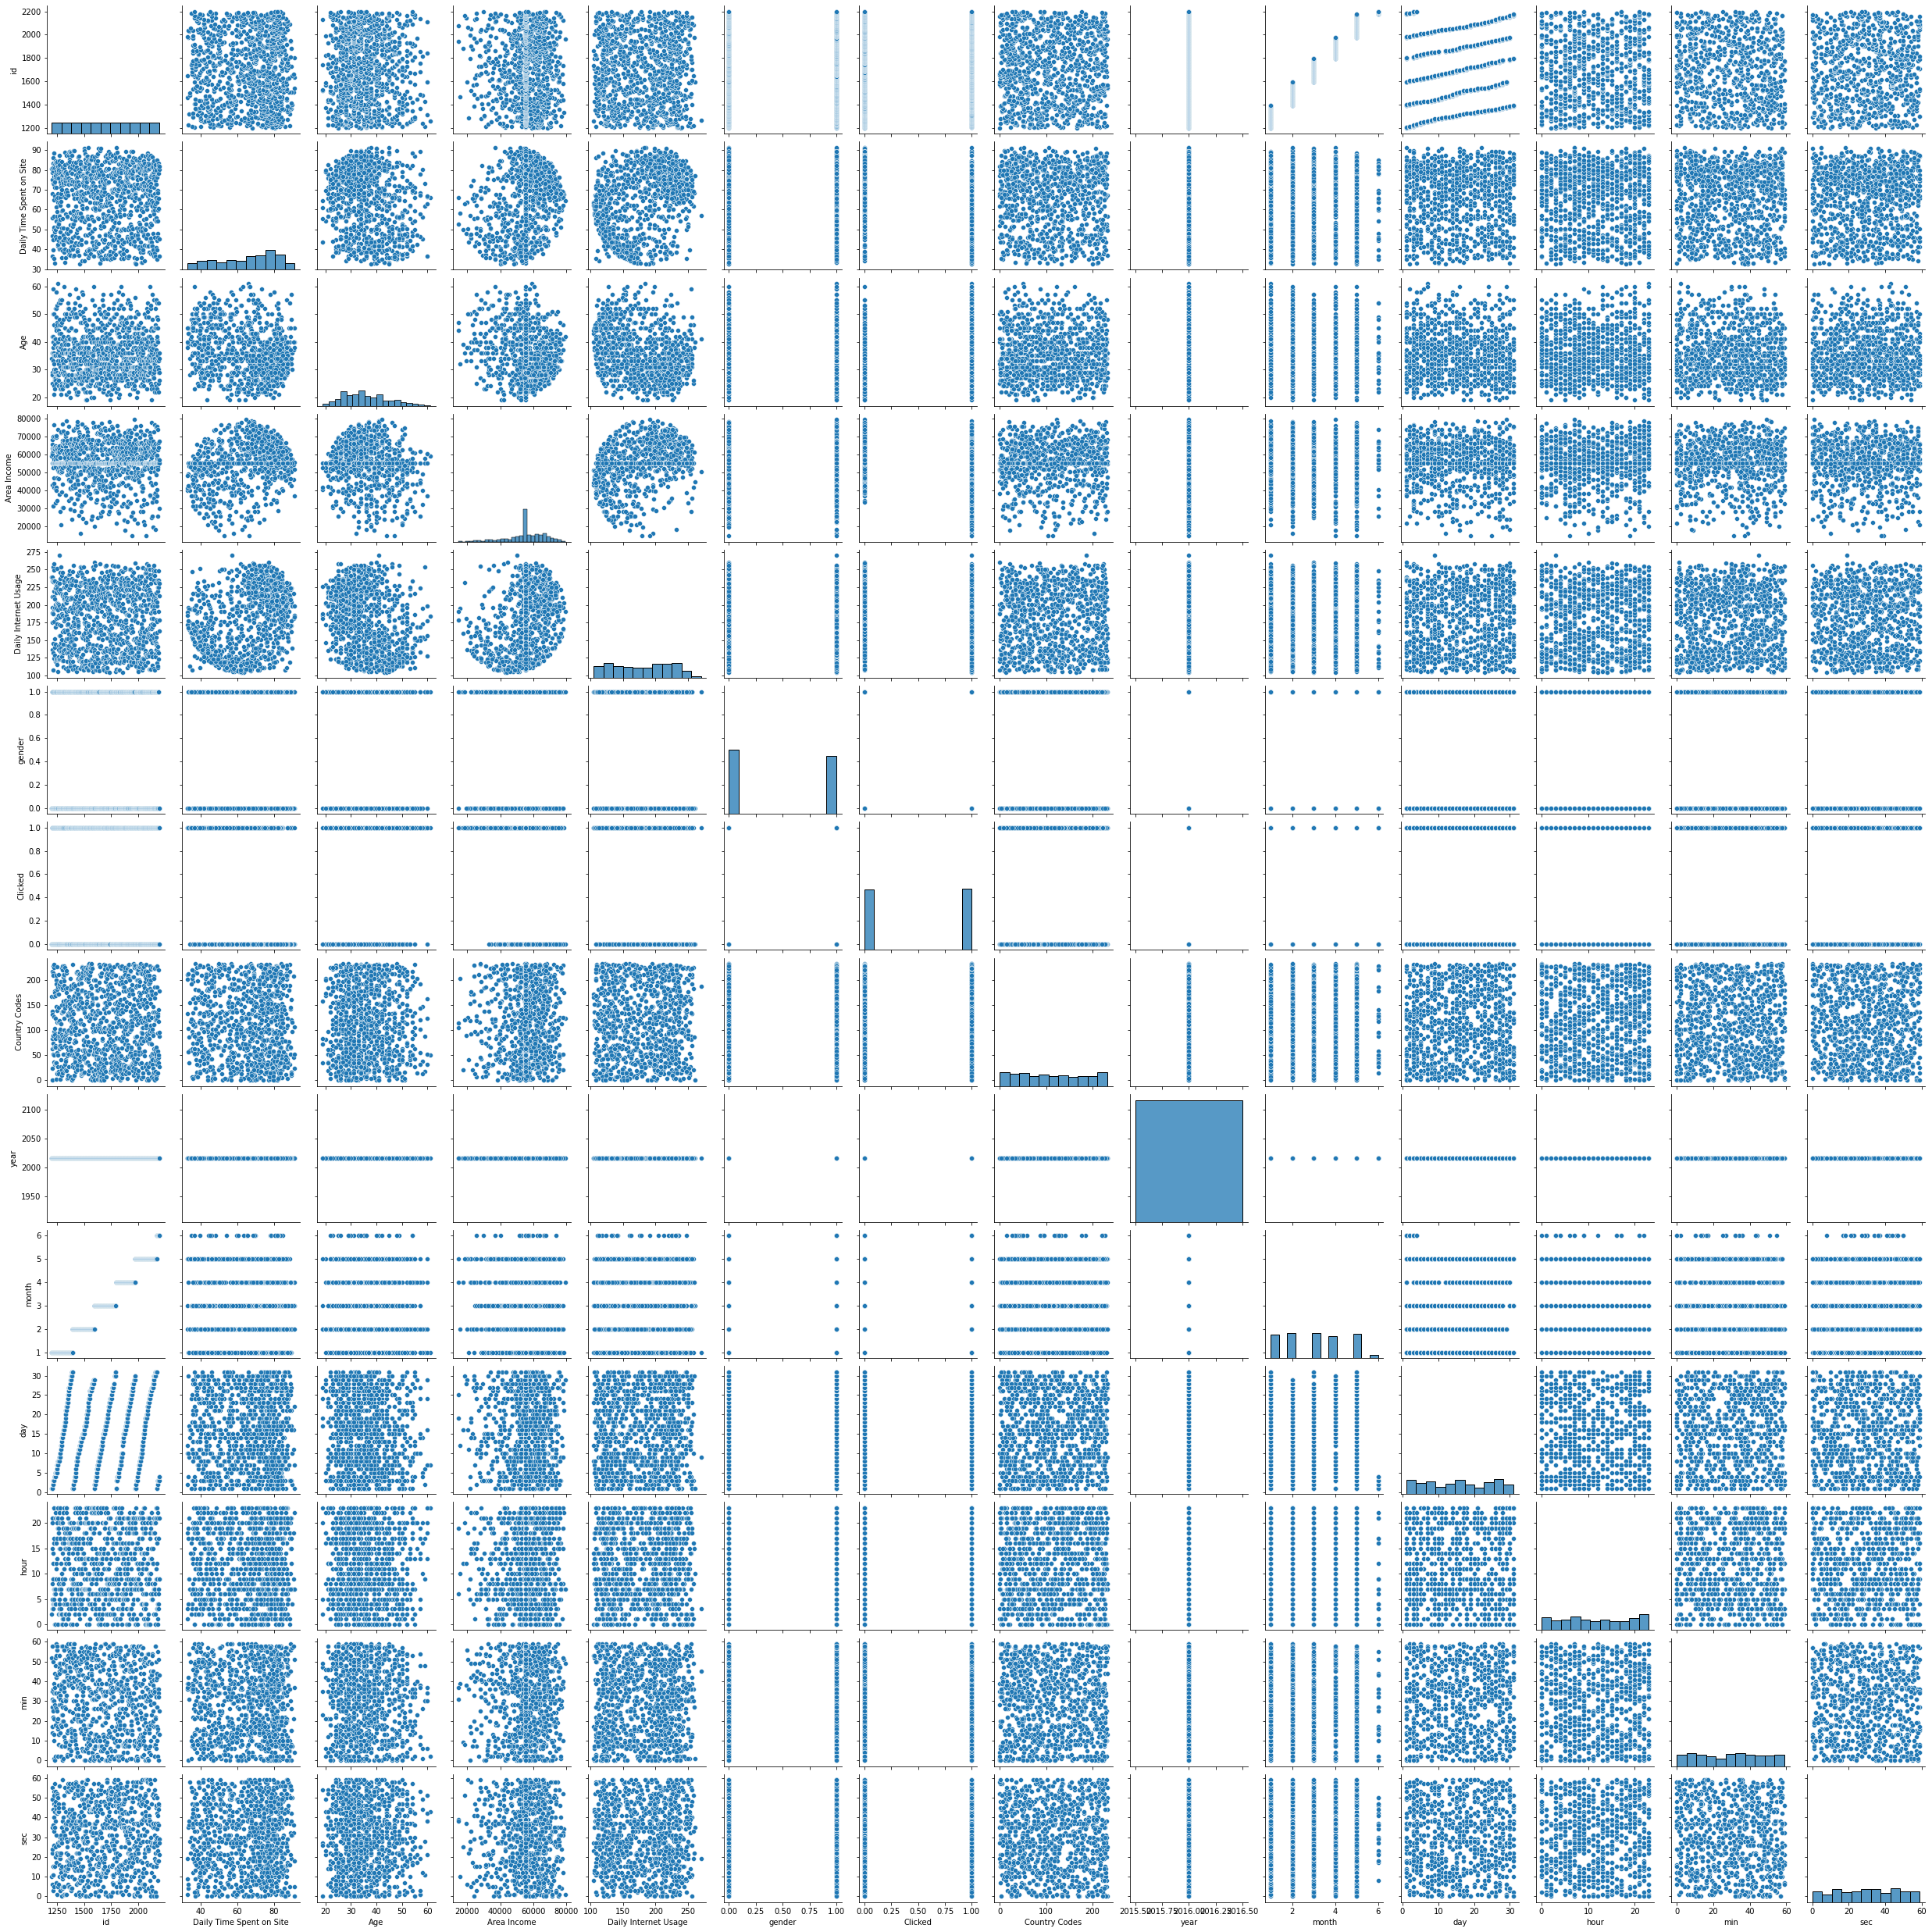

In [118]:
sns.pairplot(tr_data)

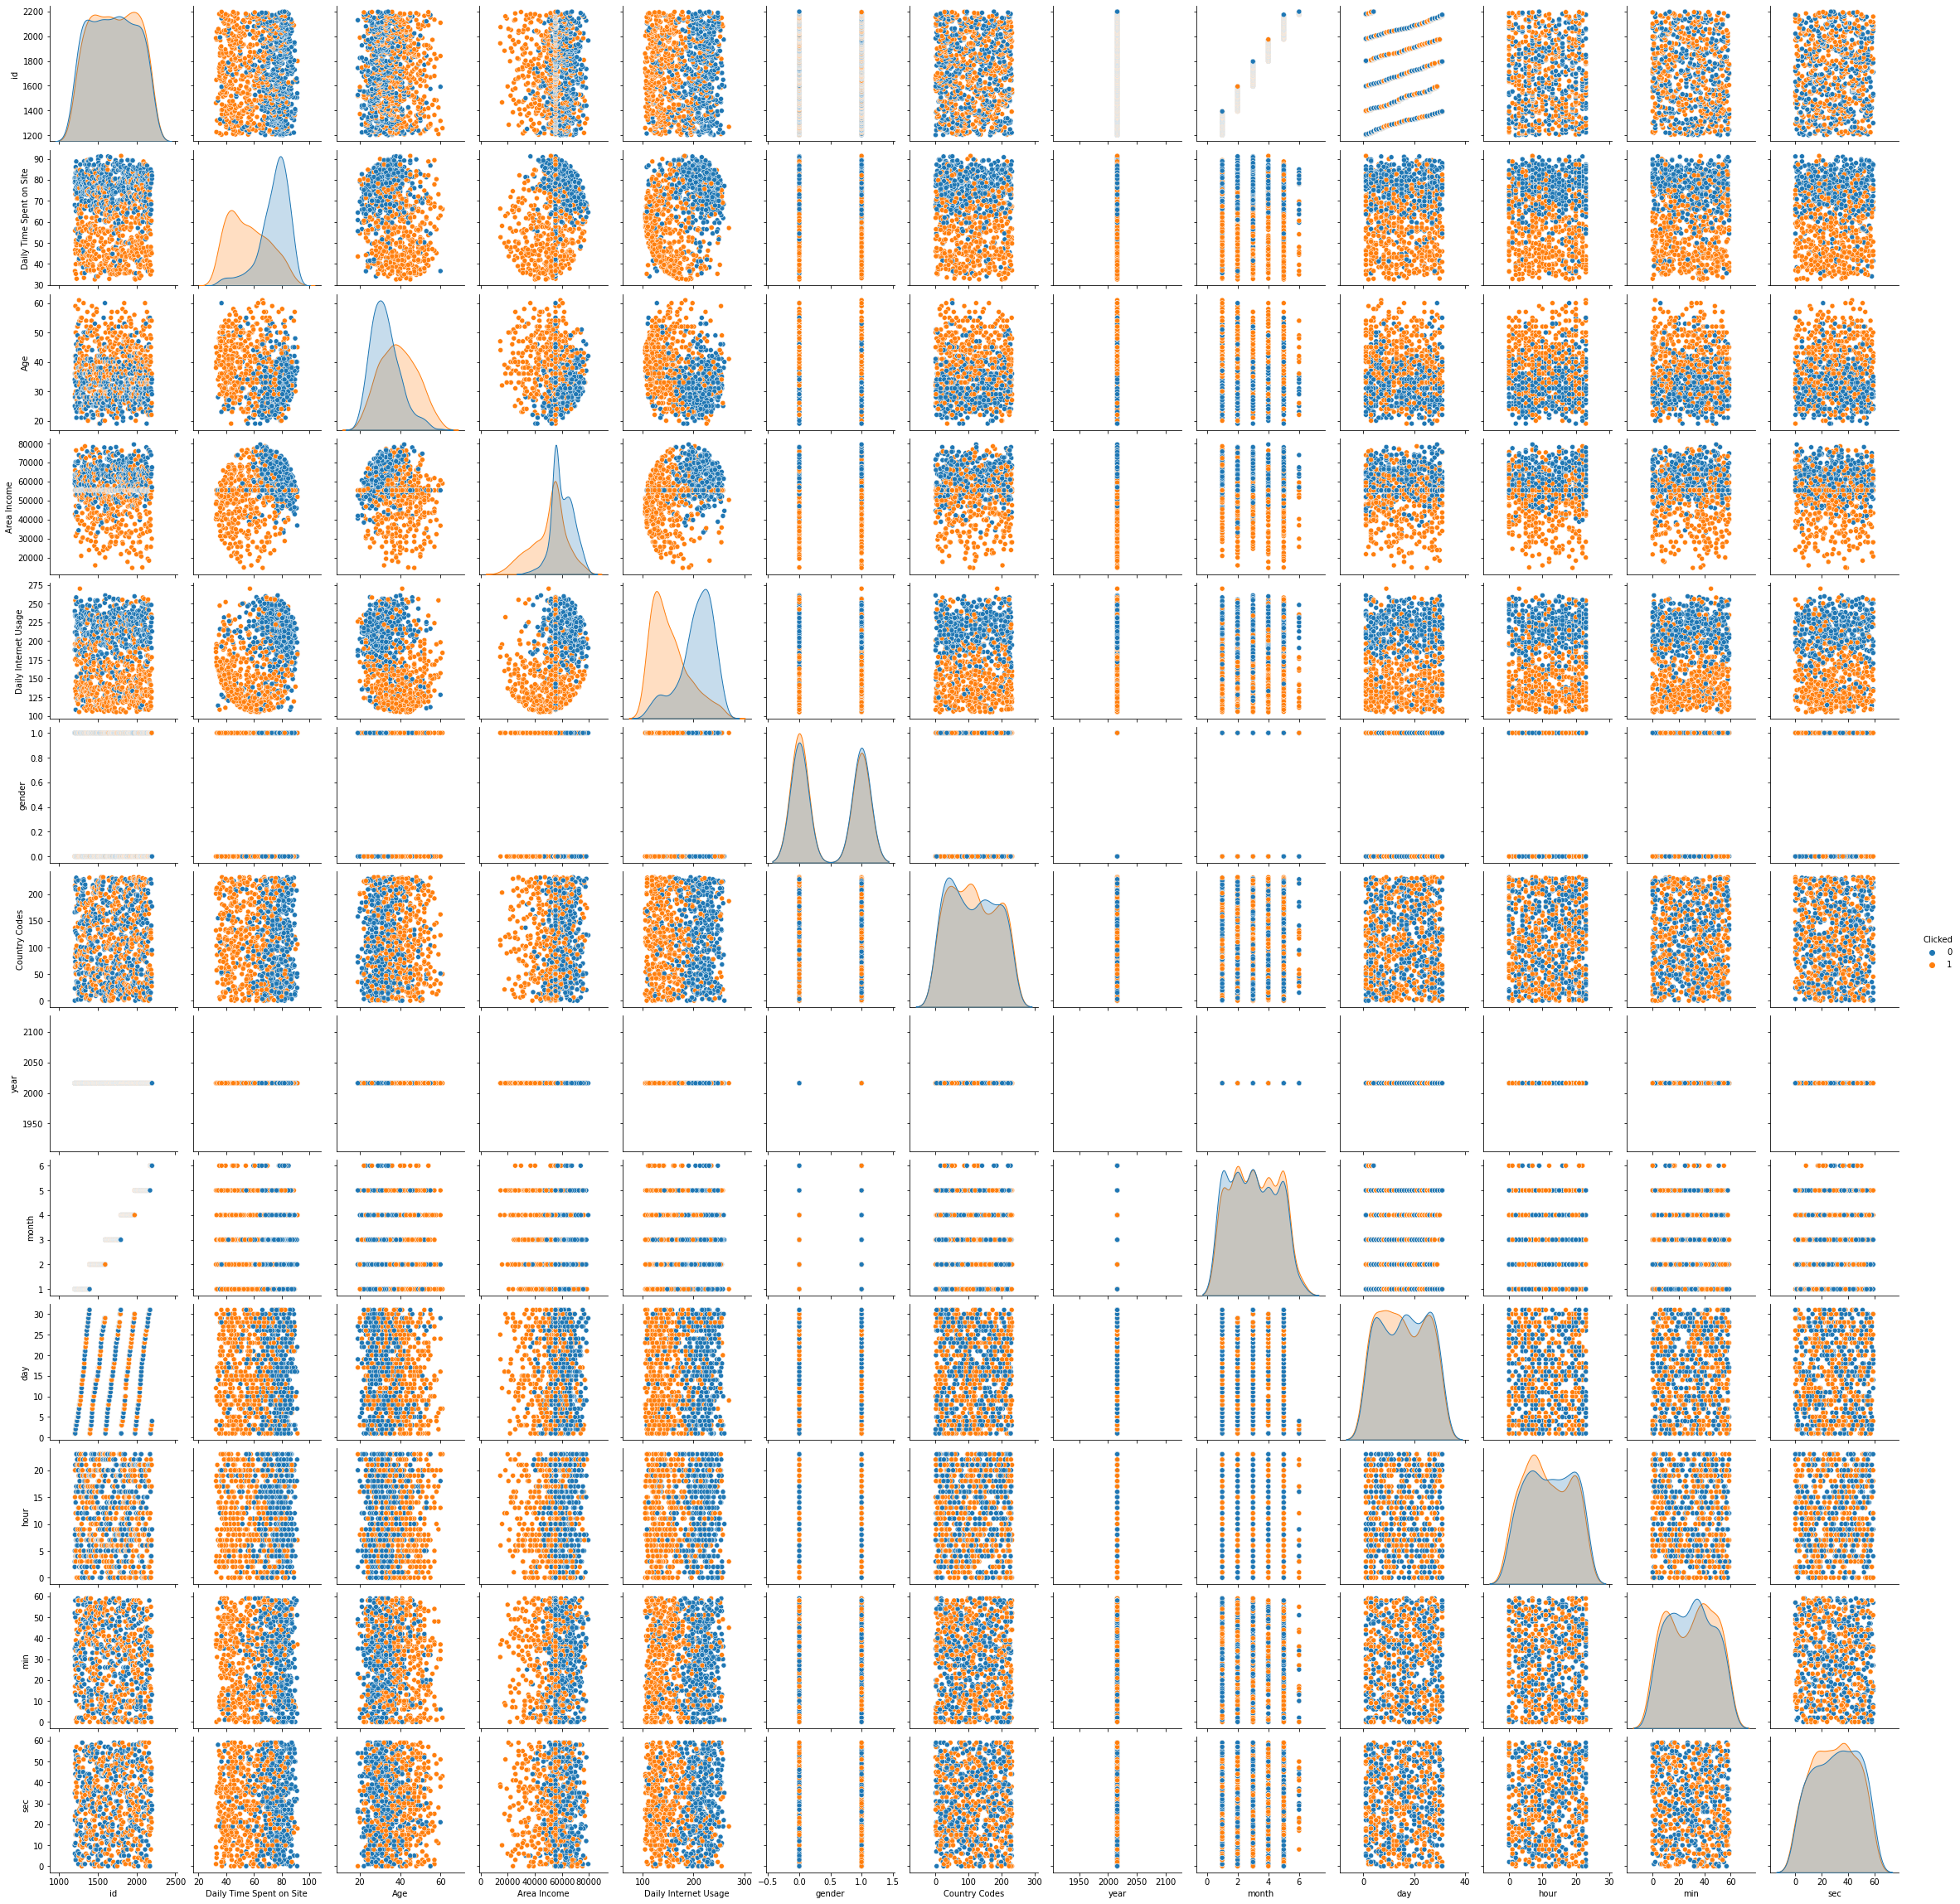

In [119]:
sns.pairplot(tr_data, hue='Clicked')

# Model Implementation

In [121]:
#X = tr_data.drop(labels=['Ad Topic Line','Country','Clicked'], axis=1)

In [124]:
#Y = tr_data['Clicked']

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state = 42)

In [139]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [140]:
log_reg_pred = log_reg_model.predict(X_test)

In [141]:
from sklearn.metrics import accuracy_score
log_reg_accuracy = accuracy_score(log_reg_pred, Y_test)
print(log_reg_accuracy*100)

82.85714285714286


In [142]:
from sklearn.tree import DecisionTreeClassifier
dec_tree_model = DecisionTreeClassifier()
dec_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [143]:
dec_tree_pred = dec_tree_model.predict(X_test)

In [144]:
dec_tree_accuracy = accuracy_score(dec_tree_pred, Y_test)
print(dec_tree_accuracy*100);

82.0


In [145]:
from sklearn.naive_bayes import GaussianNB
nav_bayes_model = GaussianNB()
nav_bayes_model.fit(X_train, Y_train)
nav_bayes_pred = nav_bayes_model.predict(X_test)

In [146]:
nav_bayes_accuracy = accuracy_score(nav_bayes_pred, Y_test)
print(nav_bayes_accuracy*100)

81.42857142857143
